In [1]:
import equinox as eqx
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import importlib
import numpy as np
from jax import grad, jit, vmap
from jax.experimental.ode import odeint

from typing import TYPE_CHECKING, Callable, Union, Optional

from VariablesClass import VariablesClass
from StructureClass import  StructureClass
from StateClass import StateClass

import plot_funcs, colors, dynamics

In [8]:
## Params

H, S = 2, 1  # # Hinges, # Shims per hinge

# --- parameters / variables ---
k_soft  = jnp.ones((H, S), dtype=jnp.float32) * 1.0
k_stiff = jnp.ones((H, S), dtype=jnp.float32) * 4.0
thetas_ss = jnp.full((H, S), 1/2, dtype=jnp.float32)  # 33° per hinge
buckle  = jnp.ones((H, S), dtype=jnp.int32)

In [9]:
# --- build geometry (all topology stays in StructureClass) ---
Strctr = StructureClass(hinges=H, shims=S, L=1)  # your StructureClass from earlier

In [10]:
# --- Initiate variables ---
Variabs = VariablesClass(Strctr,
    k_soft=k_soft,
    k_stiff=k_stiff,
    thetas_ss=thetas_ss,           # rest/target angles
    stretch_scale=10.0,              # k_stretch = 50 * max(k_stiff)
)

In [11]:
# --- state (straight chain, unit spacing => rest lengths = 1) ---
State = StateClass(Strctr, buckle)  # buckle defaults to +1

In [12]:
# --- initial energy ---
E_total, E_rot, E_stretch = State.energy(Variabs, Strctr, State.pos_arr)
print("Total:", float(E_total))
print("Rotation:", float(E_rot))
print("Stretch:", float(E_stretch))

Total: 2.0
Rotation: 2.0
Stretch: 0.0


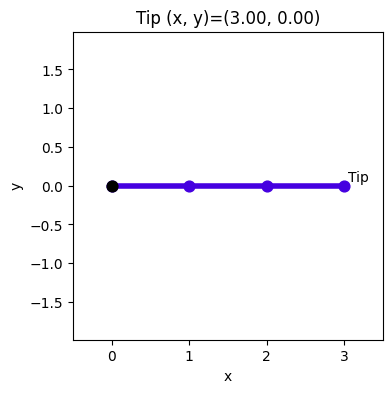

In [13]:
importlib.reload(plot_funcs)

# Suppose St.pos_arr has shape (7,2)
plot_funcs.plot_arm(State.pos_arr, L=Strctr.L)

In [18]:
state_0 = State.pos_arr
time_points = jnp.arange(0,10,0.01)
jax.debug.print("time_points = {}", time_points)
fixed_DOFs = jnp.array([0, State.pos_arr.shape[0]])

dynamics.solve_dynamics(
        time_points,
        state_0,
        Variabs,
        Strctr,
        force_function=None,
        fixed_DOFs=fixed_DOFs,
        imposed_disp_DOFs=None,
        imposed_disp_values=None,  # function of time
        # simulation parameters
        damping=0.01,
        rtol=1e-2,
        maxsteps=100,
    )

time_points = [0.         0.01       0.02       0.03       0.04       0.05
 0.06       0.07       0.08       0.09       0.09999999 0.11
 0.12       0.13       0.14       0.14999999 0.16       0.17
 0.17999999 0.19       0.19999999 0.21       0.22       0.22999999
 0.24       0.25       0.26       0.26999998 0.28       0.29
 0.29999998 0.31       0.32       0.32999998 0.34       0.35
 0.35999998 0.37       0.38       0.39       0.39999998 0.41
 0.42       0.42999998 0.44       0.45       0.45999998 0.47
 0.48       0.48999998 0.5        0.51       0.52       0.53
 0.53999996 0.55       0.56       0.57       0.58       0.59
 0.59999996 0.61       0.62       0.63       0.64       0.65
 0.65999997 0.66999996 0.68       0.69       0.7        0.71
 0.71999997 0.72999996 0.74       0.75       0.76       0.77
 0.78       0.78999996 0.79999995 0.81       0.82       0.83
 0.84       0.84999996 0.85999995 0.87       0.88       0.89
 0.9        0.90999997 0.91999996 0.93       0.94       0.95
 0.9

TypeError: or got incompatible shapes for broadcasting: (8,), (2,).